In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/265M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


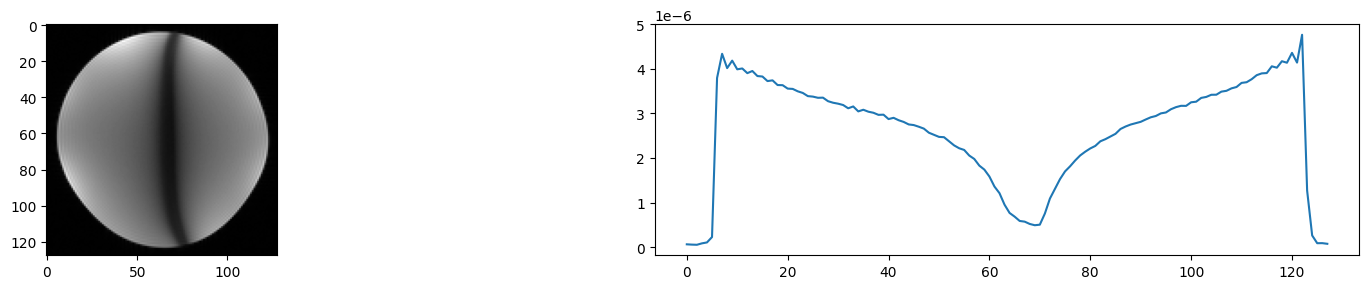

In [19]:
M90 = dataset.load_dataset7a()
M90 = M90[64:192, 64:192, : ,: ,:]
M90.shape 
simulation.view_gasp_input(M90, [10,0])

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/265M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


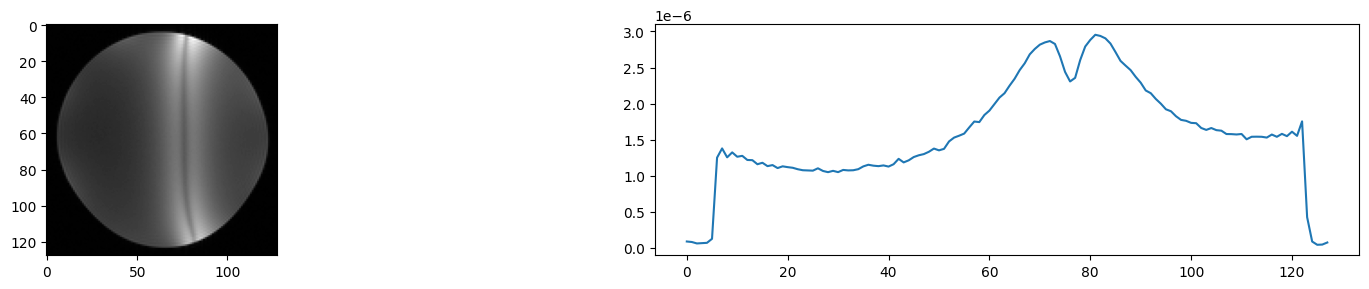

In [20]:
M20 = dataset.load_dataset7b()
M20 = M20[64:192, 64:192, : ,: ,:]
M20.shape 
simulation.view_gasp_input(M20, [10,0])

In [21]:
width = M90.shape[1]
bw = 0.4

D = []
D.append(responses.gaussian(width, bw=bw, shift=-0.3))
D.append(responses.gaussian(width, bw=bw, shift=-0.2))
D.append(responses.gaussian(width, bw=bw, shift=-0.1))
D.append(responses.gaussian(width, bw=bw, shift=0.0))
D.append(responses.gaussian(width, bw=bw, shift=0.1))
D.append(responses.gaussian(width, bw=bw, shift=0.2))
D.append(responses.gaussian(width, bw=bw, shift=0.3))
D.append(responses.gaussian(width, bw=bw, shift=0.4))



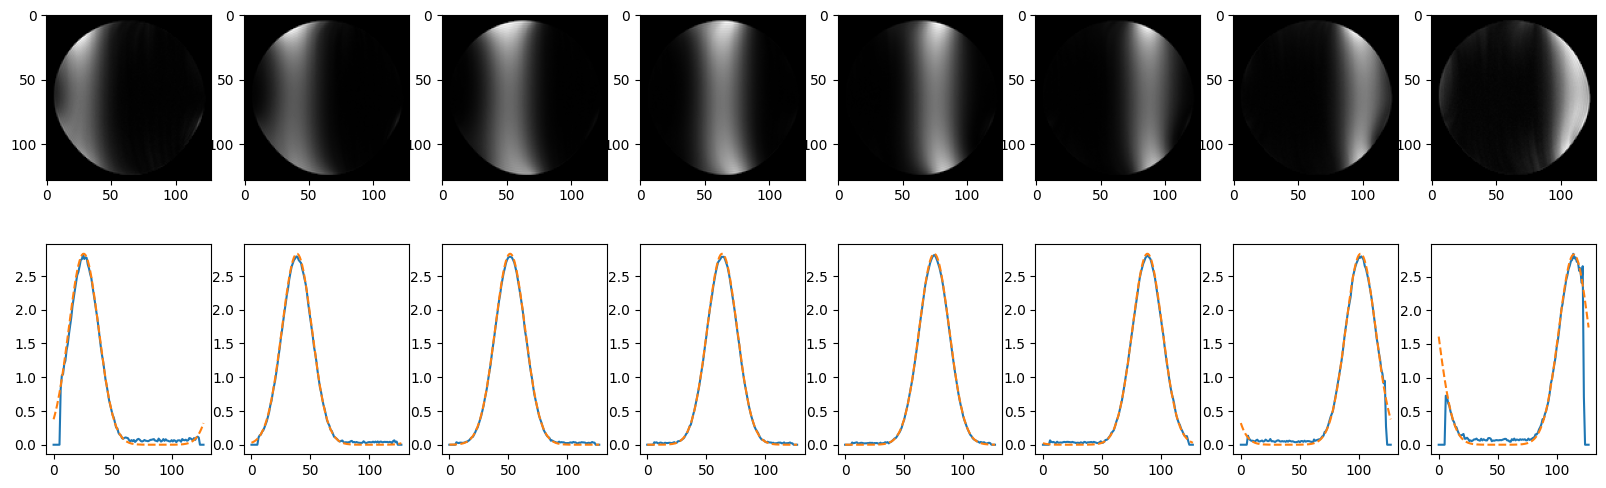

In [22]:
G90 = []
A90 = []
for d in D:
    Ic, An = simulation.train_gasp(M90, d, clines=16)    
    G90.append(Ic)
    A90.append(An)

for i in range(len(D)):
    D[i] = D[i] * math.sqrt(8)

simulation.view_gasp_comparison(G90, D)

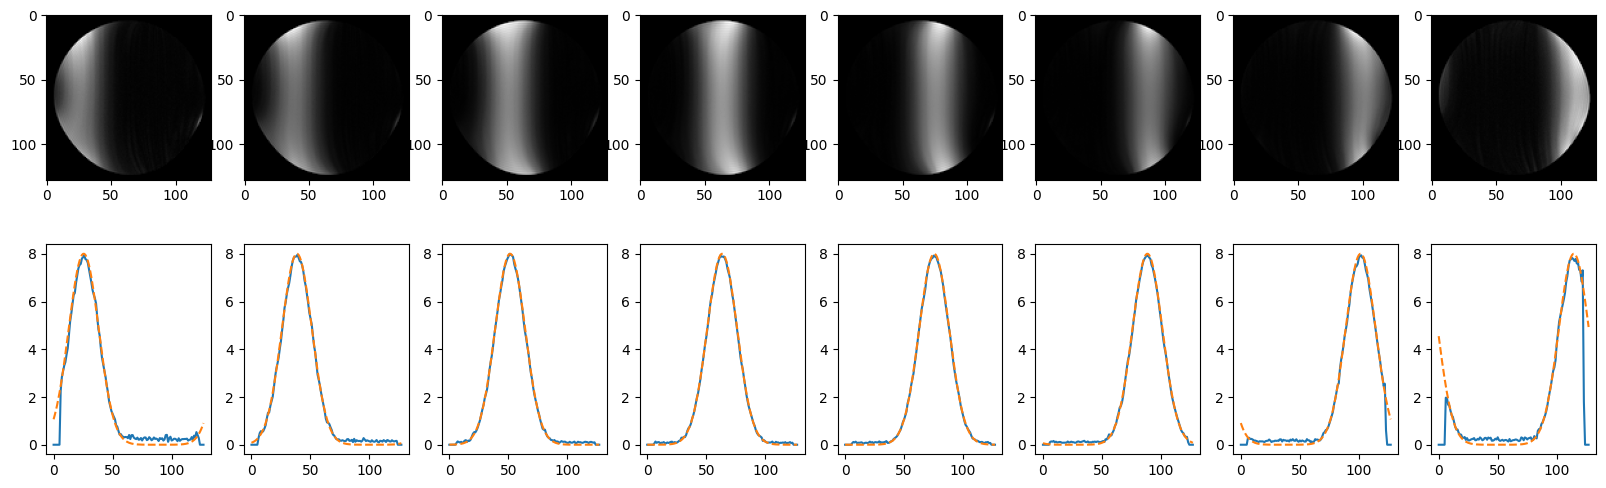

In [23]:
G20 = []
A20 = []
for d in D:
    Ic, An = simulation.train_gasp(M20, d, clines=16)    
    G20.append(Ic)
    A20.append(An)

for i in range(len(D)):
    D[i] = D[i] * math.sqrt(8)

simulation.view_gasp_comparison(G20, D)

Data: 20231106_GASP_KNEE data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


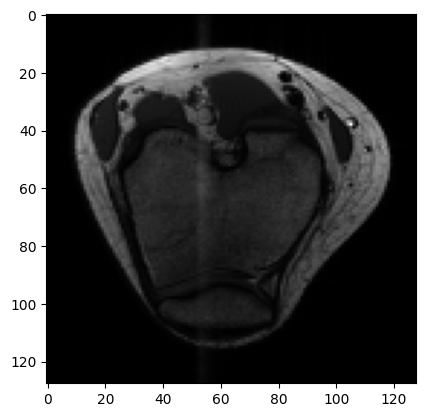

In [24]:
M_knee_90 = dataset.load_dataset8a()
M_knee_90 = M_knee_90[64:192, 64:192, : ,: ,:]
print(M_knee_90.shape)
Ma = np.sqrt(np.sum(np.abs(M_knee_90)**2, axis=2))
Ma = np.mean(Ma, axis=2)
Ma = np.mean(Ma, axis=2)
plt.imshow(np.abs(Ma), cmap='gray')
plt.show()

Data: 20231106_GASP_KNEE data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


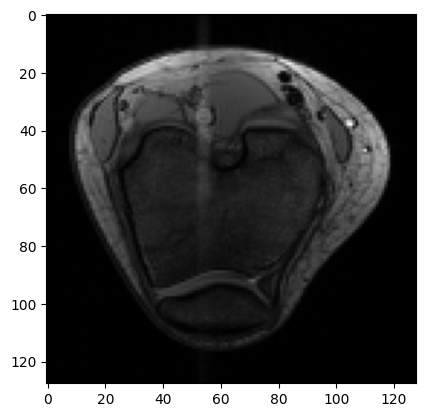

In [25]:
M_knee_20 = dataset.load_dataset8b()
M_knee_20 = M_knee_20[64:192, 64:192, : ,: ,:]
print(M_knee_20.shape)
Ma = np.sqrt(np.sum(np.abs(M_knee_20)**2, axis=2))
Ma = np.mean(Ma, axis=2)
Ma = np.mean(Ma, axis=2)
plt.imshow(np.abs(Ma), cmap='gray')
plt.show()


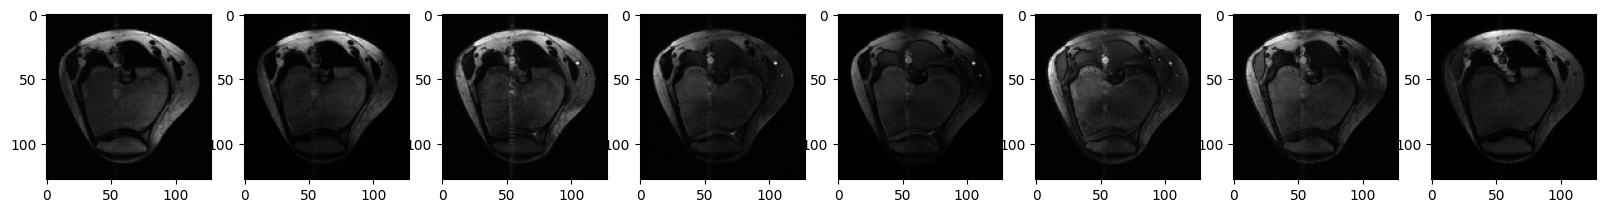

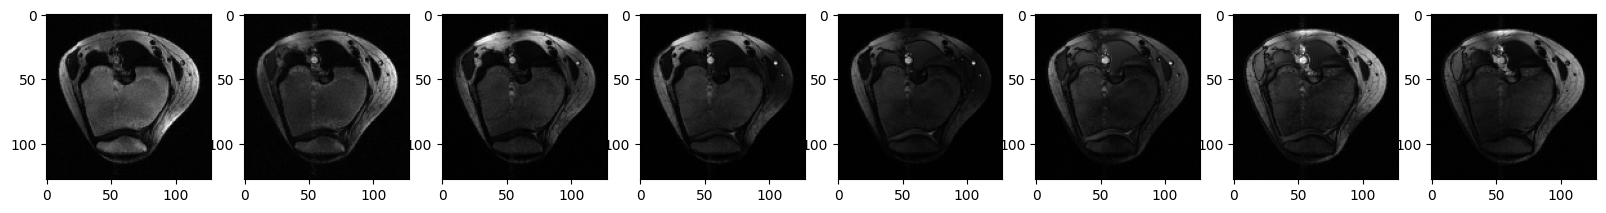

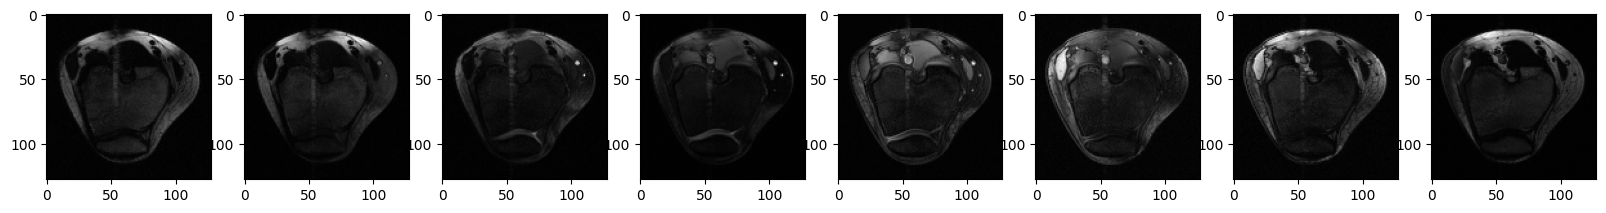

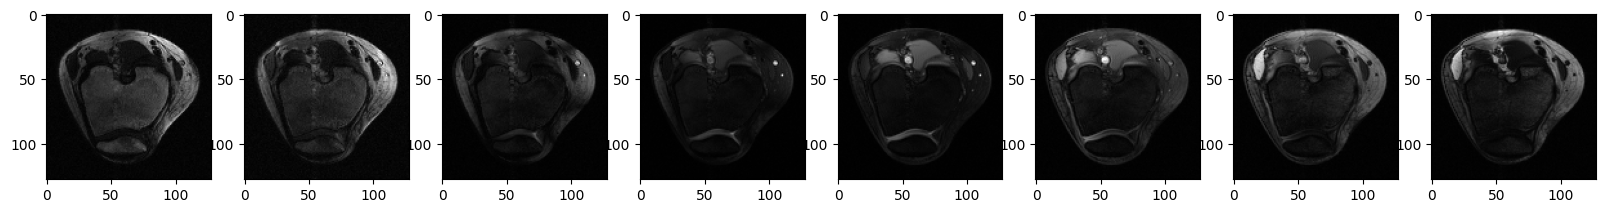

In [26]:
def plot(G):
    G = np.abs(G)

    f = plt.figure(figsize=(20,6))
    for i in range(8):
        ax = f.add_subplot(2, 8, i+1)

        g = G[i]
        ax.imshow(g, cmap='gray')

def run_gasp(M, A):
    I = []
    #for cc in range(M.shape[2]):
    for An in A:
        Ic = []
        #for An in A:
        for cc in range(M.shape[2]):
            Mc = M[:,:,cc,:,:]
            Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[0], -1))
            _I = simulation.evaluate_gasp(Mc, An[cc])
            Ic.append(_I)
        Ic = np.array(Ic)
        Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
        I.append(Ic)

    plot(I)
    return I

output0 = run_gasp(M_knee_90, A90)
output1 = run_gasp(M_knee_90, A20)
output2 = run_gasp(M_knee_20, A90)
output3 = run_gasp(M_knee_20, A20)


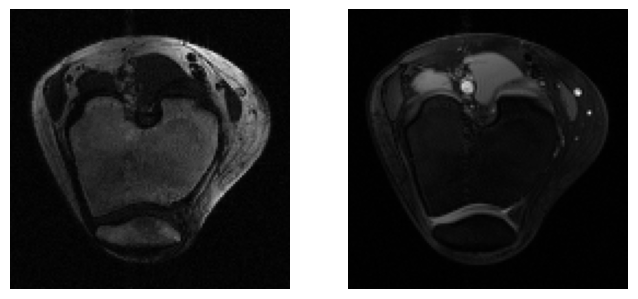

In [27]:
shift = 0.3
M_train = M20
M_data = M_knee_20
D0 = responses.gaussian(width, bw=bw, shift=-0.3) 
D1 = responses.gaussian(width, bw=bw, shift=0.1)
G0, A0 = simulation.train_gasp(M_train, D0, clines=16)    
G1, A1 = simulation.train_gasp(M_train, D1, clines=16)    

def evaluate_gasp(M, A):
    Ic = []
    for cc in range(M.shape[2]):
        Mc = M[:,:,cc,:,:]
        Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[0], -1))
        _I = simulation.evaluate_gasp(Mc, A[cc])
        Ic.append(_I)
    Ic = np.array(Ic)
    Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
    return Ic

results0 = evaluate_gasp(M_data, A0)
results1 = evaluate_gasp(M_data, A1)

f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2, 2, 1)
ax2 = f.add_subplot(2, 2, 2)
ax.imshow(results0, cmap='gray')
ax.axis('off')
ax2.imshow(results1, cmap='gray')
ax2.axis('off')
plt.show()

In [28]:
Mb = dataset.load_dataset8b()
Mb.shape

Data: 20231106_GASP_KNEE data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(256, 256, 8, 16, 3)